In [32]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

(6000, 2)

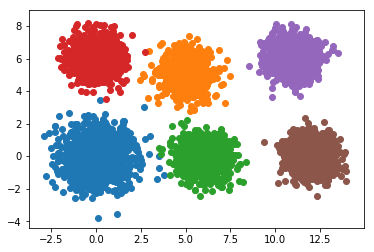

In [95]:
blob1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 1000)
blob2 = np.random.multivariate_normal([5,5], [[0.5,0],[0,0.5]], 1000)
blob3 = np.random.multivariate_normal([6,0], [[0.5,0],[0,0.5]], 1000)
blob4 = np.random.multivariate_normal([0,6], [[0.5,0],[0,0.5]], 1000)
blob5 = np.random.multivariate_normal([11,6], [[0.5,0],[0,0.5]], 1000)
blob6 = np.random.multivariate_normal([12,0], [[0.5,0],[0,0.5]], 1000)
plt.scatter(blob1[:,0], blob1[:,1])
plt.scatter(blob2[:,0], blob2[:,1])
plt.scatter(blob3[:,0], blob3[:,1])
plt.scatter(blob4[:,0], blob4[:,1])
plt.scatter(blob5[:,0], blob5[:,1])
plt.scatter(blob6[:,0], blob6[:,1])
# data_X = np.vstack((blob1,blob2))
# data_X = np.vstack((blob1,blob2,blob3))
# data_X = np.vstack((blob1,blob2,blob3,blob4))
# data_X = np.vstack((blob1,blob2,blob3,blob4,blob5))
data_X = np.vstack((blob1,blob2,blob3,blob4,blob5,blob6))
data_X.shape

In [30]:
import numpy as np
bagofwords = np.array([[3,2,0], [1,0,3], [0,1,2], [1,2,1]])
bagofwords[np.where(bagofwords > 1)] = 1
bagofwords = np.dot(bagofwords.T, bagofwords)
np.log((bagofwords+1e-12)/np.diag(bagofwords)).sum()

-2.4327906486449864

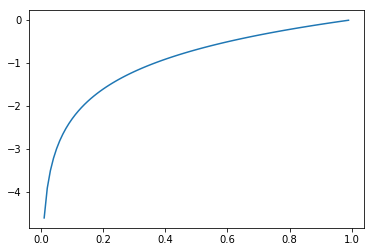

In [37]:
x = np.arange(0.01,1,0.01)
y = np.log(x)

plt.plot(x,y)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_umass_coherence(X, k_max=10):
    coherence = []
    error = []
    for k in range(1,k_max+1):
        clusters = KMeans(n_clusters=k).fit_predict(X)
        k_coherence = []
        for idx_cluster in range(k):
            cluster_data = X[clusters == idx_cluster]
            cluster_data[np.where(cluster_data > 1)] = 1
            cooccurence = np.dot(cluster_data.T, cluster_data)
            score = np.log((cooccurence+1e-12)/np.diag(cooccurence))
            k_coherence.append(score.sum())
        coherence.append(np.mean(k_coherence))
        error.append(np.std(k_coherence))
    return coherence, error

In [157]:
def get_curve_knee(x, y):
    """ Source: inding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior 
    https://raghavan.usc.edu//papers/kneedle-simplex11.pdf"""
    
    # Set baseline curve
    x_init, y_init = x[0], y[0]
    x_final, y_final = x[-1], y[-1]
    # Plot it
    plt.plot([x_init, x_final], [y_init, y_final])
    
    # Calculate line coefficients
    a = (y_final - y_init)/(x_final - x_init)
    b = y_init - a*x_init
    y_baseline_list = []
    diff = []
    for idx in range(len(x)):
        x_baseline = x[idx]
        y_baseline = a*x_baseline + b
        y_baseline_list.append(y_baseline)
        diff.append(abs(y[idx] - y_baseline))
        plt.plot([x[idx], x_baseline], [y[idx], y_baseline], c='gray')
        
    # Get optimal value
    max_diff = max(diff)
    max_diff_idx = diff.index(max_diff)
    plt.plot([x[max_diff_idx], x[max_diff_idx]], [y[max_diff_idx], y_baseline_list[max_diff_idx]], c='red')
    
    # Return optimal number of components
    return max_diff_idx

### Cluster

(6000, 2)
k = 3
CPU times: user 7.62 s, sys: 6.23 s, total: 13.8 s
Wall time: 9.17 s


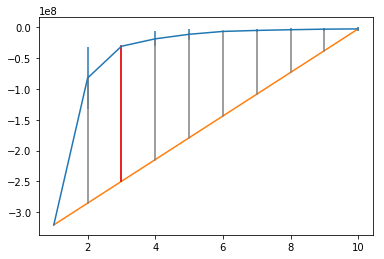

In [159]:
%%time
k_max = 10

# Calculate coherence
print(data_X.shape)
coherence, error = calculate_umass_coherence(data_X, k_max)
# coherence_norm(data_X, k_max)

# Plot data
plt.errorbar(range(1,len(coherence)+1), coherence, yerr=error)
# plt.show()

# Get best k
k = get_curve_knee(range(1,len(coherence)+1), coherence)
print("k = %d" % (k+1))